<a href="https://colab.research.google.com/github/hamzahmhmmd/snippets_for_colab/blob/main/custom_snippets_for_colab_and_jupyternotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open in colab
<a href="https://colab.research.google.com/github/hamzahmhmmd/snippets_for_colab/blob/main/custom_snippets_for_colab_and_jupyternotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
<a href="https://colab.research.google.com/github/hamzahmhmmd/snippets_for_colab/blob/main/custom_snippets_for_colab_and_jupyternotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Http server webapp

In [ ]:
from google.colab.output import eval_js
eval_js('google.colab.kernel.proxyPort(8000)')

In [ ]:
! python -m http.server 8000

# Flask ngrok webapp

In [ ]:
!pip install flask-ngrok

In [ ]:
# flask_ngrok_example.py
from flask import Flask
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

@app.route("/")
def hello():
    return "Hello World!"

if __name__ == '__main__':
    app.run()  # If address is in use, may need to terminate other sessions:
               # Runtime > Manage Sessions > Terminate Other Sessions

# Add more RAM 
[increased notebook 1](https://colab.research.google.com/drive/1EgxSYbpi0mOkIXFsUQuFdnawwsAirl-T?usp=sharing)
[increased notebook 2](https://colab.research.google.com/drive/1GqZu6zmCy2vMNMZqO78DDuHvwv_9vJcp?usp=sharing)

In [ ]:
https://colab.research.google.com/drive/1EgxSYbpi0mOkIXFsUQuFdnawwsAirl-T?usp=sharing
https://colab.research.google.com/drive/1GqZu6zmCy2vMNMZqO78DDuHvwv_9vJcp?usp=sharing

# Longer session

In [ ]:
# write this javasctipt on developer console
# function KeepClicking(){
#    console.log("Clicking");
#    document.querySelector("colab-toolbar-button#connect").click()
# }setInterval(KeepClicking,60000)

# Install Miniconda

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
! conda install -c rdkit rdkit -y

# R magic command

In [ ]:
# activate R magic
%load_ext rpy2.ipython

In [ ]:
%%R
x <- 42
print(x)

# Delete pandas dataframe

In [ ]:
import gc
import pandas as pd

df = pd.read_csv('sample_data/mnist_test.csv')

# hapus dataframe df
del df
gc.collect()

144

# Pandas styling

In [18]:
import numpy as np
import pandas as pd

def color_negative_red(val):
  color = 'red' if val < 0 else 'black'
  return 'color: %s' % color

df = pd.DataFrame(np.random.randn(5, 3))

df.style.applymap(color_negative_red)

,0,1,2
0,-1.032492,-0.526202,0.100660
1,-0.872128,-1.425704,0.113233
2,0.326361,-0.316787,0.265819
3,0.421553,0.660736,0.840090
4,-0.369980,-0.157100,-2.106528


In [15]:
df.style.bar(color='#d65f5f')

,0,1,2
0,0.557884,0.032164,0.668227
1,-0.306732,-0.591888,-0.595954
2,0.458642,0.534522,0.152810
3,-0.012608,-1.357109,0.490961
4,-1.695787,-0.098891,-0.343470


In [17]:
df.style.bar(subset=[1, 2], align='mid', color=['#d65f5f', '#5fba7d'])

,0,1,2
0,0.557884,0.032164,0.668227
1,-0.306732,-0.591888,-0.595954
2,0.458642,0.534522,0.152810
3,-0.012608,-1.357109,0.490961
4,-1.695787,-0.098891,-0.343470


# Pandas sub-total

In [10]:
df = pd.DataFrame(dict(A=[2,6,3],
                       B=[2,2,6], 
                       C=[3,2,3]))

df['col_total']     = df.apply(lambda x: x.sum(), axis=1)
df.loc['row_total'] = df.apply(lambda x: x.sum())

df

,A,B,C,col_total
0,2,2,3,7
1,6,2,2,10
2,3,6,3,12
row_total,11,10,8,29


# Pandas max shown

In [ ]:
pd.options.display.max_columns = 50  # None -> No Restrictions
pd.options.display.max_rows = 200    # None -> Be careful with this 
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Pycaret Auto ML

In [ ]:
%%capture
! pip install pycaret==2.2

In [ ]:
# loading dataset 
from pycaret.datasets import get_data 
data = get_data('diabetes') 

# initializing setup 
from pycaret.classification import *
clf1 = setup(data, target = 'Class variable') 

# compare all baseline models and select top 5
top5 = compare_models(n_select = 5) 

# tune top 5 base models
tuned_top5 = [tune_model(i) for i in top5]

# ensemble top 5 tuned models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]

# blend top 5 base models 
blender = blend_models(estimator_list = top5) 

# select best model 
best = automl(optimize = 'Recall')

# Weights and Biases [Keras ingeration]

In [ ]:
%%capture
!pip install wandb

In [ ]:
import wandb
from wandb.keras import WandbCallback

!wandb login

In [ ]:
# Initialize wandb with your project name
run = wandb.init(project='my-keras-integration',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.005,
                     "epochs": 5,
                     "batch_size": 64,
                     "loss_function": "sparse_categorical_crossentropy",
                     "architecture": "CNN",
                     "dataset": "CIFAR-10"
                 })
config = wandb.config  # We'll use this to configure our experiment

In [ ]:
# this cell contain keras oriented code
# Initialize model like you usually do.
tf.keras.backend.clear_session()
model = Model()
model.summary()

# Compile model like you usually do.
# Notice that we use config, so our metadata matches what gets executed
optimizer = tf.keras.optimizers.Adam(config.learning_rate) 
model.compile(optimizer, config.loss_function, metrics=['acc'])

In [ ]:
# We train with our beloved model.fit
# Notice WandbCallback is used as a regular callback
# We again use config
_ = model.fit(x_train, y_train,
          epochs=config.epochs, 
          batch_size=config.batch_size,
          validation_data=(x_test, y_test),
          callbacks=[WandbCallback()])

In [ ]:
run.join()

# Jupyter notebook behavior

In [25]:
# show multible output on one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

a = [1,4,6,1]
b = [2,4]

a
b

# Table of Content

* [Dataset Hasil PCA](#Dataset-Hasil-PCA)
* [Membangun Model Naïve Bayes dengan WEKA](#Membangun-Model-Naïve-Bayes-dengan-Weka)
    * [Meningkatkan Kinerja Model dengan WEKA](#Meningkatkan-Kinerja-Model-dengan-Weka)
* [Membangun Model Naïve Bayes dengan Python](#Membangun-Model-Naïve-Bayes-dengan-Python)
    * [Meningkatkan Kinerja Model dengan Python](#Meningkatkan-Kinerja-Model-dengan-Python)
* [Kesimpulan](#Kesimpulan)

In [ ]:
# ### Table of content markdown
# * [Dataset Hasil PCA](#Dataset-Hasil-PCA)
# * [Membangun Model Naïve Bayes dengan WEKA](#Membangun-Model-Naïve-Bayes-dengan-Weka)
#     * [Meningkatkan Kinerja Model dengan WEKA](#Meningkatkan-Kinerja-Model-dengan-Weka)
# * [Membangun Model Naïve Bayes dengan Python](#Membangun-Model-Naïve-Bayes-dengan-Python)
#     * [Meningkatkan Kinerja Model dengan Python](#Meningkatkan-Kinerja-Model-dengan-Python)
# * [Kesimpulan](#Kesimpulan)

# Retina res plot

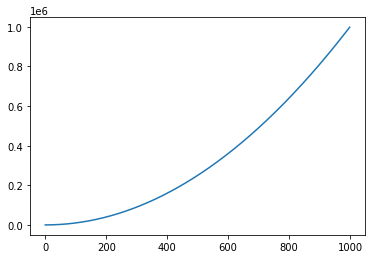

In [1]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
%matplotlib inline

x = range(1000)
y = [i ** 2 for i in x]

plt.plot(x,y)
plt.show;